In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv(filepath_or_buffer='D:\Documentos\Documentos\DataAnalysis\ebac\Python\Modulo23\supermarket_sales.csv')
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
691,266-20-6657,C,Naypyitaw,Member,Male,Food and beverages,55.04,7,19.2640,404.5440,3/12/2019,19:39,Ewallet,385.28,4.761905,19.2640,5.2
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,14:15,Cash,10.17,4.761905,0.5085,5.9
837,670-71-7306,B,Mandalay,Normal,Male,Sports and travel,44.63,6,13.3890,281.1690,1/2/2019,20:08,Credit card,267.78,4.761905,13.3890,5.1
764,787-87-2010,A,Yangon,Member,Male,Health and beauty,55.50,4,11.1000,233.1000,1/20/2019,15:48,Credit card,222.00,4.761905,11.1000,6.6
287,226-71-3580,C,Naypyitaw,Normal,Female,Sports and travel,23.75,9,10.6875,224.4375,1/31/2019,12:02,Cash,213.75,4.761905,10.6875,9.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
for column in  df.columns:
    data_type = df[column].dtype

    if data_type == 'object':
        len_ = df[column].str.len().max()
    
    else :
        len_ = df[column].max()
    
    print(f'{column} - {data_type} - {len_}')
    

Invoice ID - object - 11
Branch - object - 1
City - object - 9
Customer type - object - 6
Gender - object - 6
Product line - object - 22
Unit price - float64 - 99.96
Quantity - int64 - 10
Tax 5% - float64 - 49.65
Total - float64 - 1042.65
Date - object - 9
Time - object - 5
Payment - object - 11
cogs - float64 - 993.0
gross margin percentage - float64 - 4.761904762
gross income - float64 - 49.65
Rating - float64 - 10.0


In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df['Date'].astype(dtype=np.datetime64).dt.month.unique()

array([1, 3, 2], dtype=int64)

In [6]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
df.sort_values(by='Date', inplace=True)
df['Date'] = df['Date'].astype(dtype=np.datetime64).dt.date
df['Purchase Month'] = df['Date'].apply(lambda x: x.strftime('%B-%Y')) 

pd.pivot_table(data=df, index='Purchase Month',  columns='Customer type', values='Invoice ID', aggfunc='count', margins=True)

Customer type,Member,Normal,All
Purchase Month,,,
February-2019,163,140,303
January-2019,172,180,352
March-2019,166,179,345
All,501,499,1000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


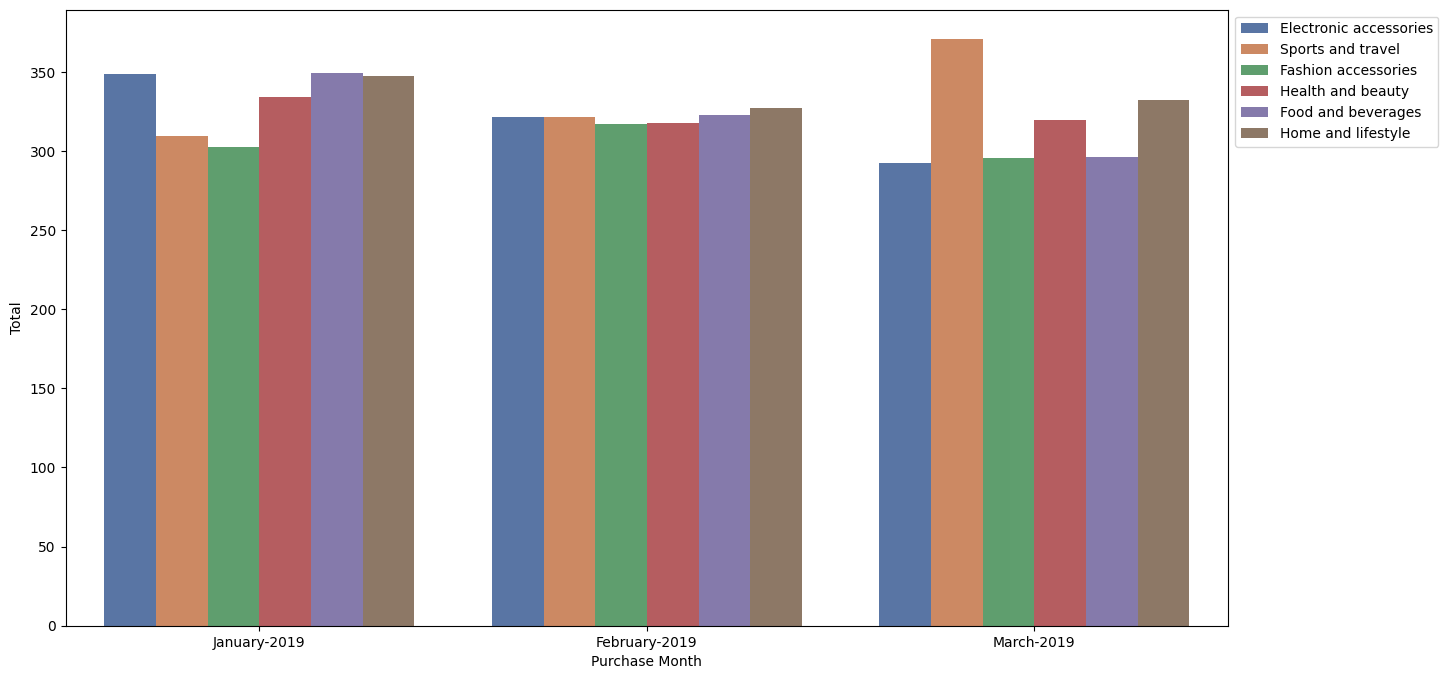

In [8]:
# Product lines más vendidos por mes
plt.figure(figsize=(15,8))
plt.legend()
sns.barplot(data=df, x='Purchase Month', y='Total', hue='Product line', errorbar=None, palette='deep')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))



Text(0.5, 1.0, 'Total de Ventas por Tipo de Producto')

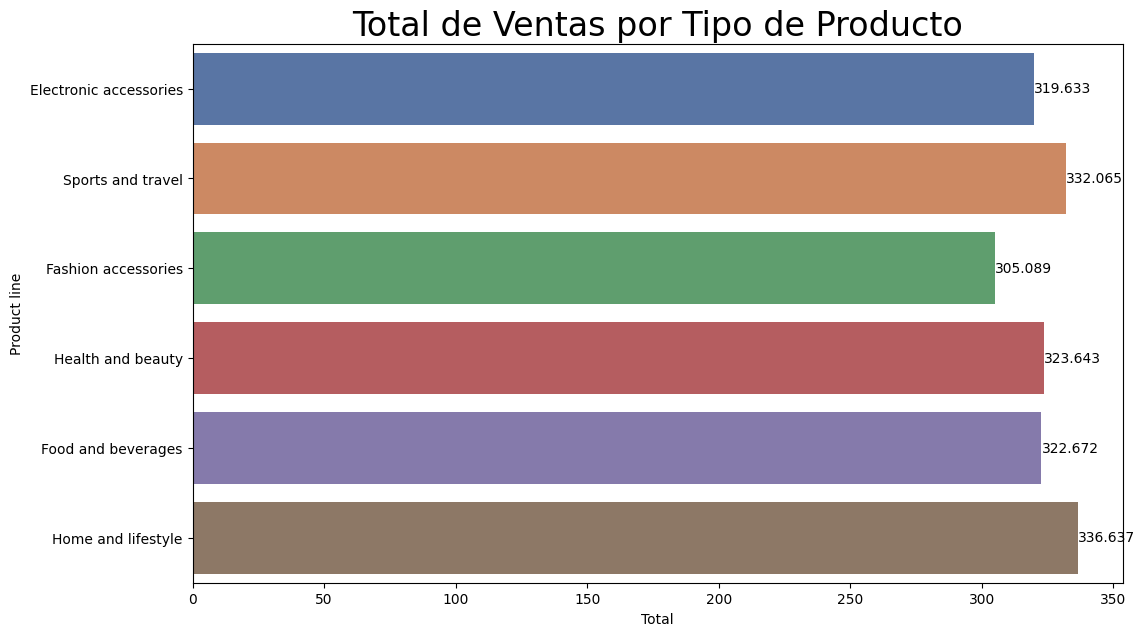

In [9]:
# Ranking de items vendidos por venta total
plt.figure(figsize=(12,7))
ax = sns.barplot(data=df, x='Total', y='Product line', errorbar=None, palette='deep')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Total de Ventas por Tipo de Producto', fontsize=24)


[Text(0, 0, '170'),
 Text(0, 0, '178'),
 Text(0, 0, '174'),
 Text(0, 0, '152'),
 Text(0, 0, '160'),
 Text(0, 0, '166')]

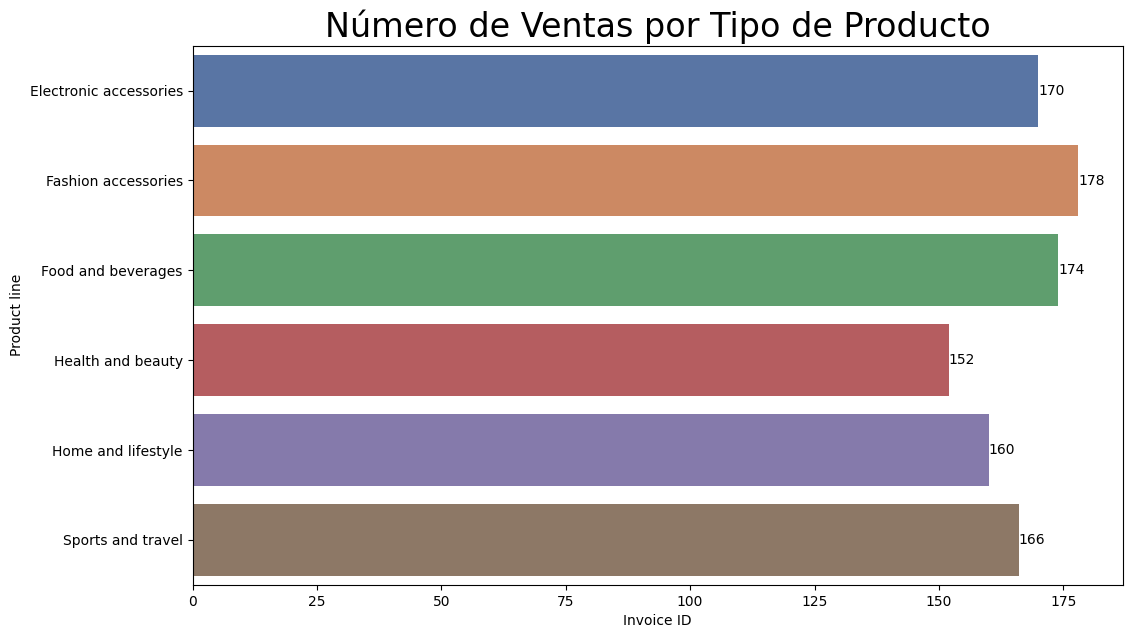

In [10]:
# Ranking de product line por número de ventas
plt.figure(figsize=(12,7))
pivot = pd.pivot_table(data=df, index='Product line', values='Invoice ID', aggfunc='count').reset_index()

ax = sns.barplot(data=pivot, x='Invoice ID', y='Product line', palette='deep')
plt.title('Número de Ventas por Tipo de Producto', fontsize=24)
ax.bar_label(ax.containers[0], fontsize=10)


<AxesSubplot: xlabel='Date', ylabel='Total'>

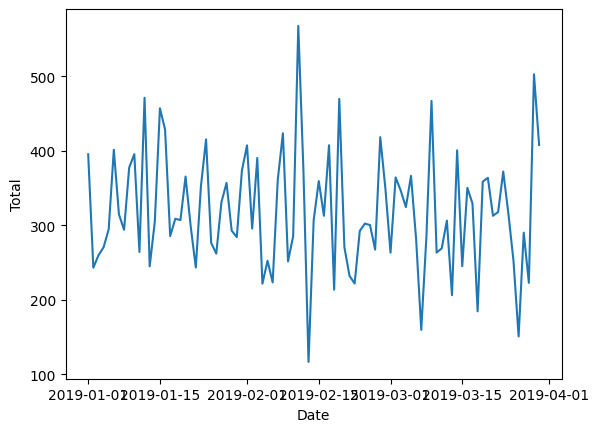

In [12]:
sns.lineplot(data=df, x='Date', y='Total', errorbar=None)